In [1]:
## Hold, Shift, Tab, TAb and it it provides Python documentation

# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

# What does the code mean?  Here's the break down ...
# We create a cities list to store city names.
# We iterate through the coordinates, as in our practice, and retrieve the nearest city...
#... using the latitude and longitude pair.
# We add a decision statement with the logical operator not in to determine whether the found city is...
#... already in the cities list. If not, then we'll use the append() function to add it. We are doing this because...
#... among the 1,500 latitudes and longitudes, there might be duplicates, which will retrieve duplicate cities, and we want to be sure we capture only the unique cities.

620

In [ ]:
# Starting URL for Weather Map API Call.
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in our list.....This would need a second for loop, so instead use enumerate()
# we need to iterate through our list of cities...
#... and begin building the URL for each city, while grouping our records in sets of 50
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    #if (i % 50 == 0 and i >= 50):
    #    set_count += 1
    #    record_count = 1
    #    time.sleep(60)

    # Create endpoint URL with each city.
    #city_url = url + "&q=" + cities[i]

In [8]:
# Loop through all the cities in the list.
#Every time we want to reference the city in our code, we need to use the indexing on the cities list. 
# Unfortunately, this will cause programming errors when we are building the city_url because it adds the index, 
# not the city name, to the city_url. To fix this issue, we need to create another for loop to get the city from 
# the cities list.

#Instead of using two for loops, we can use the enumerate() method as an alternative way to iterate through the list of cities and retrieve both the index, and the city from the list. The syntax for the enumerate() method is the following:
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Let's break down the code so we understand fully before continuing:

# We create the for loop with the enumerate() method and reference the index and the city in the list.
# In the conditional statement, we check if the remainder of the index divided by 50 is equal to 0 and if 
# ... the index is greater than or equal to 50. If the statement is true, then the set_count and the record_count are 
# ...incremented by 1.
# Inside the conditional statement, we create the URL endpoint for each city, as before. However, we are 
#...removing the blank spaces in the city name and concatenating the city name with, city.replace(" ","+"). 
#This will find the corresponding weather data for the city instead of finding the weather data for the first part...
# of the city name.
#Also, we add a print statement that tells us the record count and set count, and the city that is being processed.
#Then we add one to the record count before the next city is processed.
#Next, we will retrieve the data from the JSON weather response for each city.

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | dubovskoye
Processing Record 2 of Set 1 | sembe
Processing Record 3 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | dombarovskiy
Processing Record 6 of Set 1 | klaksvik
Processing Record 7 of Set 1 | sao filipe
Processing Record 8 of Set 1 | nanhai
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | sokolo
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | muhos
Processing Record 13 of Set 1 | ahipara
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | morondava
Processing Record 22 of Set 1 | banjar
Processing Record 23 of Set 1 | nouadhibou
P

Processing Record 37 of Set 4 | petrozavodsk
Processing Record 38 of Set 4 | castro
Processing Record 39 of Set 4 | khambhaliya
Processing Record 40 of Set 4 | thompson
Processing Record 41 of Set 4 | codrington
Processing Record 42 of Set 4 | tutoia
Processing Record 43 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 44 of Set 4 | cidreira
Processing Record 45 of Set 4 | serra branca
Processing Record 46 of Set 4 | hithadhoo
Processing Record 47 of Set 4 | sept-iles
Processing Record 48 of Set 4 | aswan
Processing Record 49 of Set 4 | grand gaube
Processing Record 50 of Set 4 | rio gallegos
Processing Record 1 of Set 5 | isangel
Processing Record 2 of Set 5 | kedrovyy
Processing Record 3 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 4 of Set 5 | chokurdakh
Processing Record 5 of Set 5 | deniliquin
Processing Record 6 of Set 5 | fortuna
Processing Record 7 of Set 5 | barrow
Processing Record 8 of Set 5 | tiksi
Processing Record 9 of Set 5 |

Processing Record 22 of Set 8 | huambo
Processing Record 23 of Set 8 | vallenar
Processing Record 24 of Set 8 | gamba
Processing Record 25 of Set 8 | mount gambier
Processing Record 26 of Set 8 | coihaique
Processing Record 27 of Set 8 | belmonte
Processing Record 28 of Set 8 | iqaluit
Processing Record 29 of Set 8 | kilindoni
Processing Record 30 of Set 8 | byron bay
Processing Record 31 of Set 8 | pemangkat
Processing Record 32 of Set 8 | hede
Processing Record 33 of Set 8 | samfya
Processing Record 34 of Set 8 | manitouwadge
Processing Record 35 of Set 8 | redlands
Processing Record 36 of Set 8 | yulara
Processing Record 37 of Set 8 | waipawa
Processing Record 38 of Set 8 | burns lake
Processing Record 39 of Set 8 | komsomolskiy
Processing Record 40 of Set 8 | westpunt
City not found. Skipping...
Processing Record 41 of Set 8 | iquitos
Processing Record 42 of Set 8 | koumac
Processing Record 43 of Set 8 | abu samrah
Processing Record 44 of Set 8 | warmbad
Processing Record 45 of Set

Processing Record 10 of Set 12 | wajir
Processing Record 11 of Set 12 | hami
Processing Record 12 of Set 12 | kousseri
Processing Record 13 of Set 12 | minab
Processing Record 14 of Set 12 | mogadishu
Processing Record 15 of Set 12 | tucson
Processing Record 16 of Set 12 | poum
Processing Record 17 of Set 12 | waterloo
Processing Record 18 of Set 12 | luganville
Processing Record 19 of Set 12 | hunza
City not found. Skipping...
Processing Record 20 of Set 12 | mergui
City not found. Skipping...
Processing Record 21 of Set 12 | awjilah
Processing Record 22 of Set 12 | riyadh
Processing Record 23 of Set 12 | platteville
Processing Record 24 of Set 12 | tado
Processing Record 25 of Set 12 | bagan
Processing Record 26 of Set 12 | bay roberts
Processing Record 27 of Set 12 | labuhan
Processing Record 28 of Set 12 | tomatlan
Processing Record 29 of Set 12 | talpa
Processing Record 30 of Set 12 | buraydah
Processing Record 31 of Set 12 | adre
Processing Record 32 of Set 12 | kitimat
Processin

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [17]:
#reorder columns, by assigning a variable to an array of the columns in desired order
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dubovskoye,RU,2022-04-24 02:16:48,47.4092,42.7575,48.00,79,68,7.74
1,Sembe,CG,2022-04-24 02:16:48,1.6481,14.5806,70.14,99,97,2.37
2,Bluff,NZ,2022-04-24 02:16:49,-46.6000,168.3333,52.81,71,89,20.56
3,Dombarovskiy,RU,2022-04-24 02:16:49,50.7587,59.5386,38.52,80,100,13.76
4,Klaksvik,FO,2022-04-24 02:16:49,62.2266,-6.5890,43.72,84,100,21.27
...,...,...,...,...,...,...,...,...,...
561,Leningradskiy,RU,2022-04-24 02:31:58,69.3833,178.4167,26.11,88,100,3.89
562,Isabela,PH,2022-04-24 02:31:58,6.7085,121.9711,86.05,72,34,5.75
563,Athabasca,CA,2022-04-24 02:31:58,54.7169,-113.2854,52.21,74,81,7.87
564,Lasa,IT,2022-04-24 02:31:59,46.6166,10.7002,43.68,98,99,5.64


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Module 6 Section 3:
###  Create a series of scatter plots for each weather parameter against the latitude for all the cities, including:
   - latitude vs. maximum temperature, 
   - latitude vs. humidity, 
   - latitued vs. cloudiness, and 
   - latitude vs. wind speed.

## 6.3.1 Plot Lattitude vs. Temperature

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [23]:
# Import time module
import time

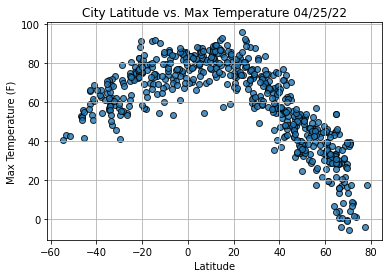

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

The balance of the scatter plots will share the same format. All we need to do is change the y-axis variable for each weather parameter. Let's create the scatter plots quickly by copying the code and changing the y-axis variable.

## 6.3.3 Plot Latitude vs. Cloudiness

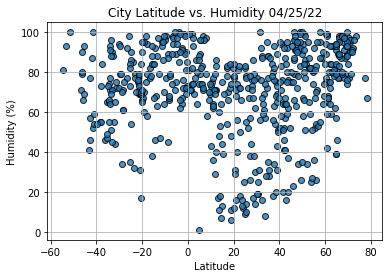

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

## 6.3.3 Plot Latitude vs. Cloudiness

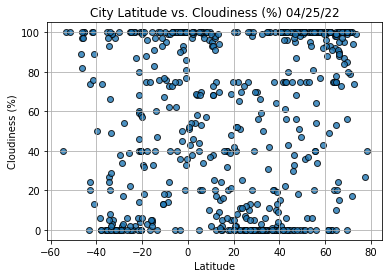

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

## 6.3.4 Plot Latitude vs. Wind Speed

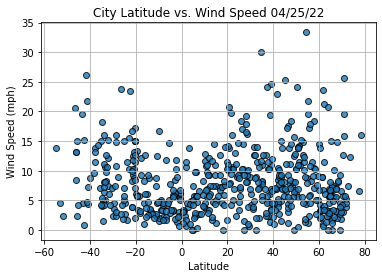

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

## 6.4.1 Use Linear Regression to Find the Relationship Between Variables

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [47]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dubovskoye,RU,2022-04-24 02:16:48,47.4092,42.7575,48.00,79,68,7.74
1,Sembe,CG,2022-04-24 02:16:48,1.6481,14.5806,70.14,99,97,2.37
3,Dombarovskiy,RU,2022-04-24 02:16:49,50.7587,59.5386,38.52,80,100,13.76
4,Klaksvik,FO,2022-04-24 02:16:49,62.2266,-6.5890,43.72,84,100,21.27
5,Sao Filipe,CV,2022-04-24 02:16:50,14.8961,-24.4956,74.23,75,0,7.38


## 6.4.2 Find the Correlation Between Latitude and Maximum Temperature

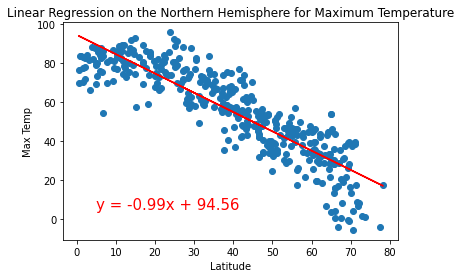

In [78]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(5,5))

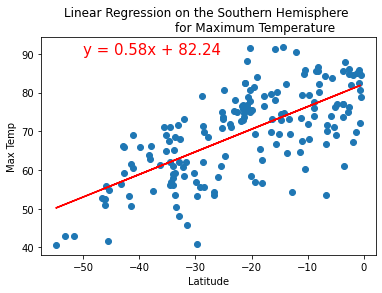

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for Maximum Temperature', 'Max Temp',(-50,90))

Finding: The correlation between the latitude and the maximum temperature is very strong to strong because the r-value is less than –0.99 for the Northern Hemisphere and greater than 0.58 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. Note there are several more points plotted in the norther hemisphere. In fact their are 389 compared the the southern hemisphers 177.      len(northern_hemi_df)

## 6.4.3 Find the Correlation Between Latitude and Percent Humidity

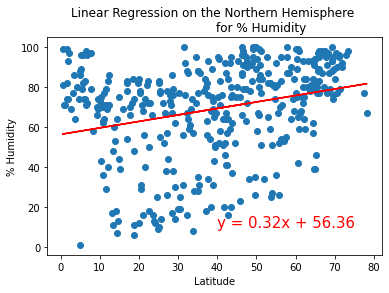

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for % Humidity', '% Humidity',(40,10))

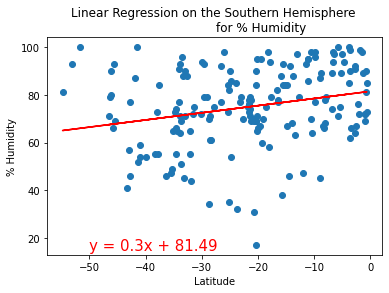

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for % Humidity', '% Humidity',(-50,15))

The correlation between the latitude and percent humidity is moderate to low because the r-value is 0.32 for the Northern and and 0.58 for the Southern Hemispheres for the plots shown here. This means that percent humidity is does not have a strong relationship, but does provide some predictablity, as the temperature increase percent humidity increases.

## 6.4.4 Find the Correlation Between Latitude and Percent Cloudiness

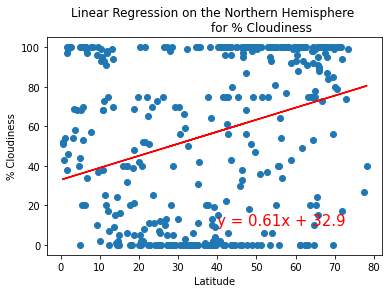

In [80]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for % Cloudiness', '% Cloudiness',(40,10))

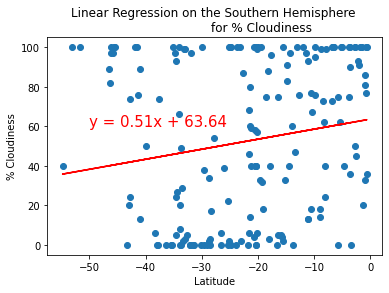

In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for % Cloudiness', '% Cloudiness',(-50,60))

FINDING
The correlation between the latitude and percent cloudiness is moderate because the r-value is 0.61 for the Northern Hemisphere and 0.51 for the Southern Hemisphere for the plots shown here. This means that as temperature increases, percent cloudiness increases.

# ?????? What are text coordinates and how would I determine them?  Specifically for 6.4.4 Northern Humidity

## 6.4.5 Find the Correlation Between Latitude and Wind Speed

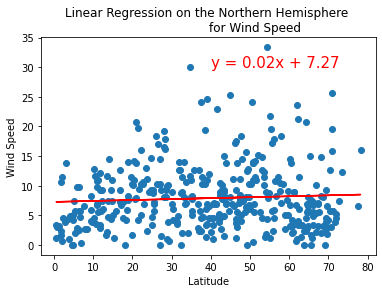

In [98]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for Wind Speed', 'Wind Speed',(40,30))

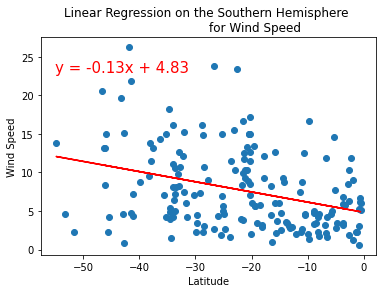

In [106]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for Wind Speed', 'Wind Speed',(-55,23))

The correlation between the latitude and wind speed is very low because the r-value is less  than 0.02 for the Northern Hemisphere and less than –0.13 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. 

6.5.1  Which Google Maps dependencies was I supposed it enable?

## 6.5.2 Create Heatmaps for Weather Parameters